In [1]:
# -------------------------------------------
# Probability & Statistics Simulation Project
# Jupyter Notebook Version (inline plots)
# -------------------------------------------

import random
import numpy as np
import matplotlib.pyplot as plt

# Make plots show inline
%matplotlib inline

Coin Toss (10,000 trials): (0.494, 0.506)


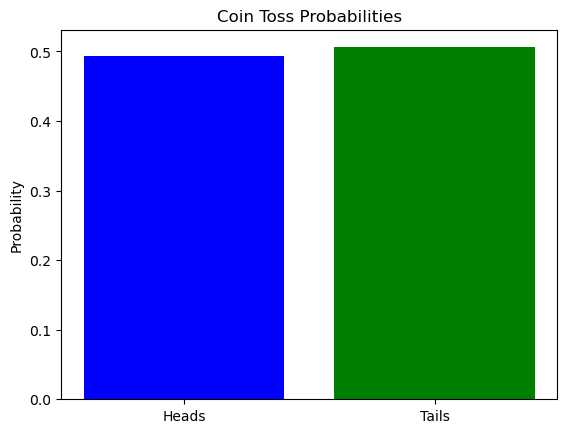

In [2]:
# Coin Toss Simulation
def coin_toss_simulation(trials=10000):
    outcomes = {"Heads": 0, "Tails": 0}
    for _ in range(trials):
        toss = random.choice(["Heads", "Tails"])
        outcomes[toss] += 1
    prob_heads = outcomes["Heads"] / trials
    prob_tails = outcomes["Tails"] / trials
    return prob_heads, prob_tails

coin_probs = coin_toss_simulation()
print("Coin Toss (10,000 trials):", coin_probs)

# Bar chart
plt.bar(["Heads", "Tails"], coin_probs, color=["blue", "green"])
plt.title("Coin Toss Probabilities")
plt.ylabel("Probability")
plt.show()


Dice (sum = 7): 0.1647


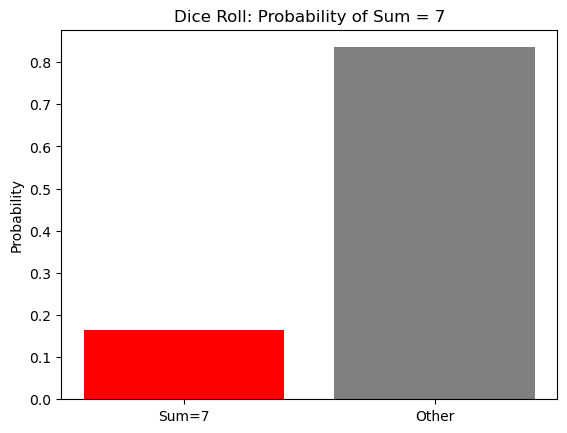

In [3]:
# Dice Sum Simulation
def dice_sum_simulation(trials=10000):
    count_sum7 = 0
    for _ in range(trials):
        dice1, dice2 = random.randint(1, 6), random.randint(1, 6)
        if dice1 + dice2 == 7:
            count_sum7 += 1
    return count_sum7 / trials

dice_prob = dice_sum_simulation()
print("Dice (sum = 7):", dice_prob)

plt.bar(["Sum=7", "Other"], [dice_prob, 1-dice_prob], color=["red", "gray"])
plt.title("Dice Roll: Probability of Sum = 7")
plt.ylabel("Probability")
plt.show()


In [4]:
# At least one 6 in 10 rolls
def prob_at_least_one_six(trials=10000, rolls=10):
    success = 0
    for _ in range(trials):
        if any(random.randint(1, 6) == 6 for _ in range(rolls)):
            success += 1
    return success / trials

one_six_prob = prob_at_least_one_six()
print("At least one 6 in 10 rolls:", one_six_prob)


At least one 6 in 10 rolls: 0.8444


In [5]:
def bag_simulation(trials=1000):
    colors = ["Red"]*5 + ["Green"]*7 + ["Blue"]*8
    prev, given_prev_blue, red_given_blue = None, 0, 0
    for _ in range(trials):
        draw = random.choice(colors)
        if prev == "Blue":
            given_prev_blue += 1
            if draw == "Red":
                red_given_blue += 1
        prev = draw
    return red_given_blue / given_prev_blue if given_prev_blue > 0 else None

cond_prob = bag_simulation()
print("P(Red | Previous Blue):", cond_prob)


P(Red | Previous Blue): 0.2506265664160401


In [6]:
def discrete_rv_sample(size=1000):
    values = [1, 2, 3]
    probs = [0.25, 0.35, 0.4]
    sample = np.random.choice(values, size=size, p=probs)
    mean, var, std = np.mean(sample), np.var(sample), np.std(sample)
    return mean, var, std

discrete_stats = discrete_rv_sample()
print("Discrete RV Stats (mean, var, std):", discrete_stats)


Discrete RV Stats (mean, var, std): (2.082, 0.6472760000000001, 0.8045346481041075)


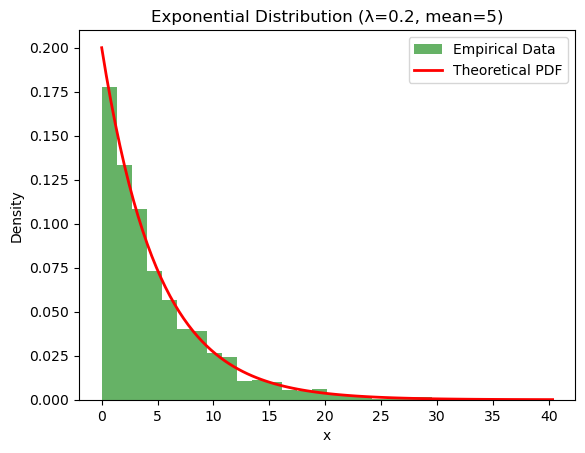

In [7]:
def exponential_simulation(lam=1/5, size=2000):
    sample = np.random.exponential(scale=1/lam, size=size)
    plt.hist(sample, bins=30, density=True, alpha=0.6, color='g', label="Empirical Data")
    x = np.linspace(0, max(sample), 100)
    pdf = lam * np.exp(-lam * x)
    plt.plot(x, pdf, 'r-', lw=2, label="Theoretical PDF")
    plt.title("Exponential Distribution (λ=0.2, mean=5)")
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

exponential_simulation()


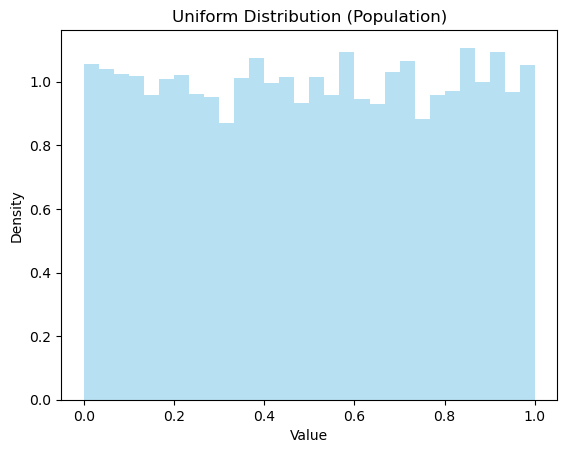

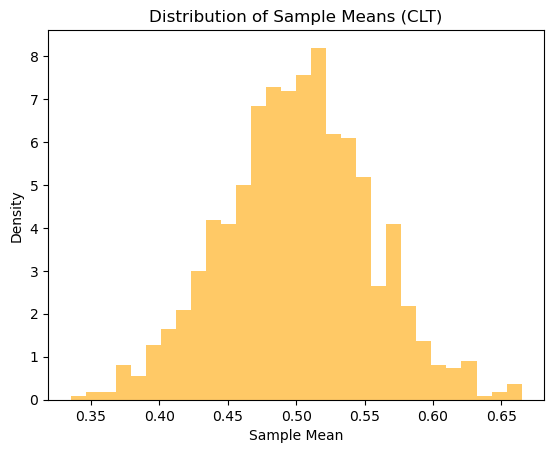

In [8]:
def clt_simulation(total_samples=1000, sample_size=30):
    population = np.random.uniform(0, 1, 10000)
    sample_means = [np.mean(np.random.choice(population, size=sample_size))
                    for _ in range(total_samples)]

    # Population
    plt.hist(population, bins=30, density=True, alpha=0.6, color="skyblue")
    plt.title("Uniform Distribution (Population)")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.show()

    # Sample Means
    plt.hist(sample_means, bins=30, density=True, alpha=0.6, color="orange")
    plt.title("Distribution of Sample Means (CLT)")
    plt.xlabel("Sample Mean")
    plt.ylabel("Density")
    plt.show()

clt_simulation()
